In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv', encoding='Windows-1252')


In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

1. Data Cleaning


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
 #drop last 3 columns
df.drop(columns =['Unnamed: 2' , 'Unnamed: 3','Unnamed: 4'], inplace =True)

In [8]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
#renaming the columns
df.rename(columns={'v1':'target','v2' :'text'},inplace = True)

In [10]:
df.shape

(5572, 2)

In [11]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()


In [13]:
df['target']=encoder.fit_transform(df['target'])

In [14]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
#checking for duplicate values
df.duplicated().sum()

403

In [16]:
df = df.drop_duplicates(keep='first')

In [17]:
df.shape

(5169, 2)

2. EDA

In [19]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

Matplotlib is building the font cache; this may take a moment.


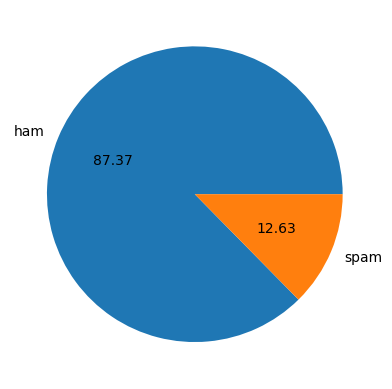

In [21]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham' , 'spam' ],autopct= "%0.2f")
plt.show()

In [22]:
#data is imbalanced



In [23]:
df['num_characters']=df['text'].apply(len)

In [24]:
import nltk

In [25]:
!pip install nltk

In [26]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to D:\sara phone\New
[nltk_data]     folder\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [27]:
df['num_characters'] = df['text'].apply(len) 

In [28]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [29]:
#num of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [30]:
 df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [31]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [32]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [33]:
df[['num_characters','num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [34]:
#ham messages
df[df['target']==0][['num_characters','num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [35]:
#spam messages
df[df['target']==1][['num_characters','num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [36]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

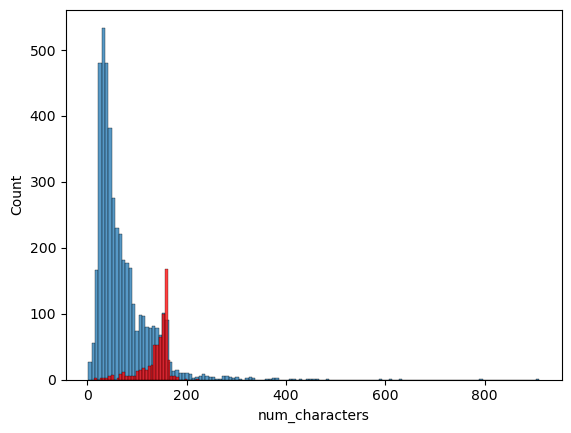

In [37]:
sns.histplot(df[df['target'] ==0]['num_characters'])
sns.histplot(df[df['target'] ==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

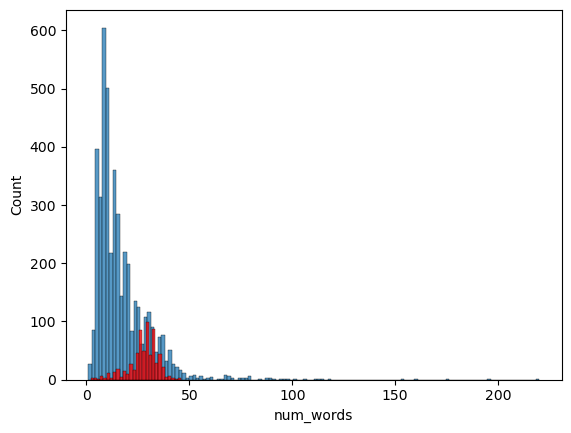

In [38]:
sns.histplot(df[df['target'] ==0]['num_words'])
sns.histplot(df[df['target'] ==1]['num_words'],color='red')

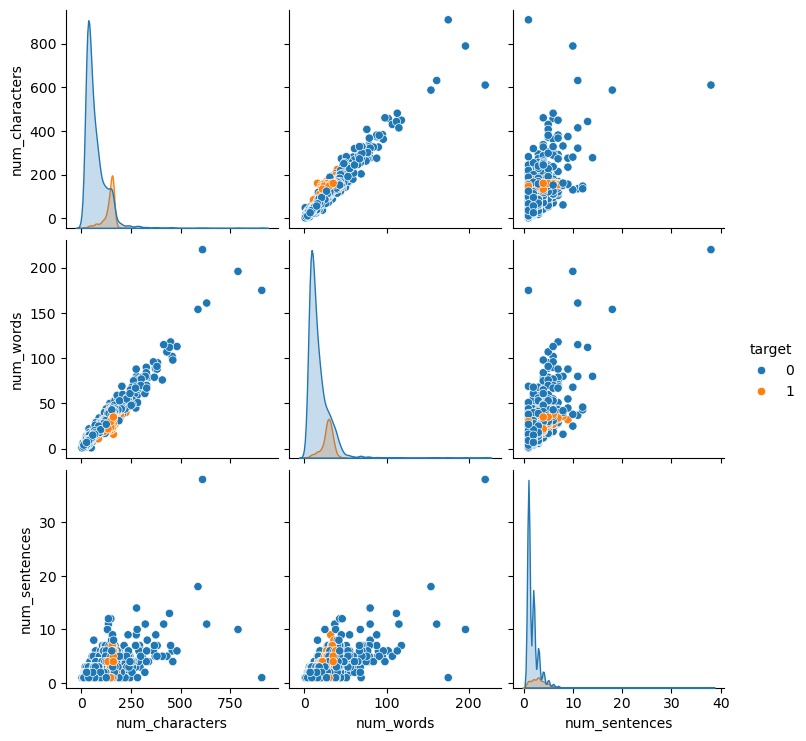

In [39]:
sns.pairplot(df,hue='target')

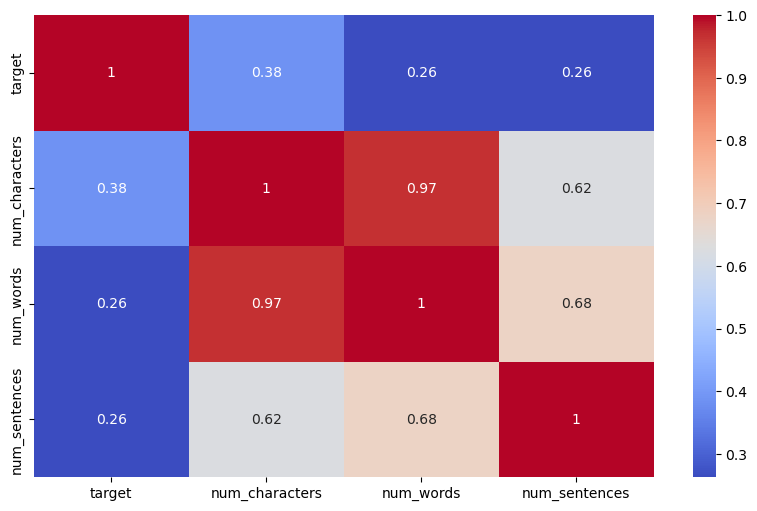

In [40]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Generate heatmap
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.show() 

In [41]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()


##3.Data Preprocessing
 .lower case
 .tokenization
 .removing special characters
 .removing stop words and puncuatuation
 .stemming

In [43]:
def transform_text(text):
    text= text.lower()
    text = nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)

    text=y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    
    return " ".join(y)
    

In [44]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')


[nltk_data] Downloading package stopwords to D:\sara phone\New
[nltk_data]     folder\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [45]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [46]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [47]:
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()
ps.stem('dancing')

'danc'

In [48]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [49]:
df['transformed_text']=df['text'].apply(transform_text)

In [50]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [51]:
!pip install wordcloud
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [52]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

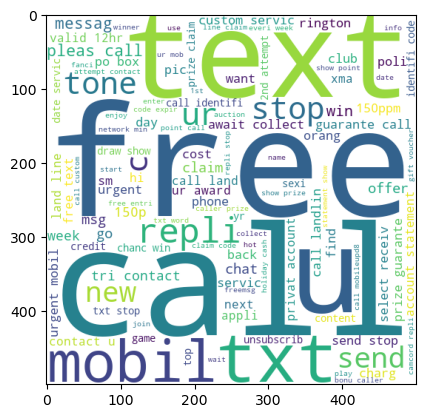

In [53]:
plt.imshow(spam_wc)

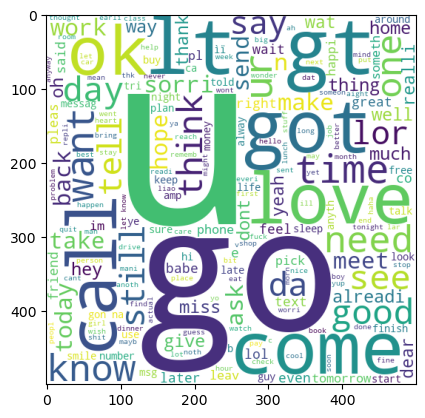

In [54]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.imshow(ham_wc)

In [55]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
    

In [56]:
len(spam_corpus)

9939

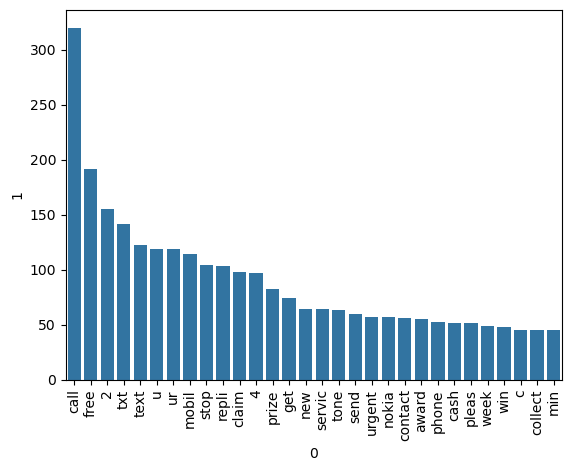

In [57]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()



In [58]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
    

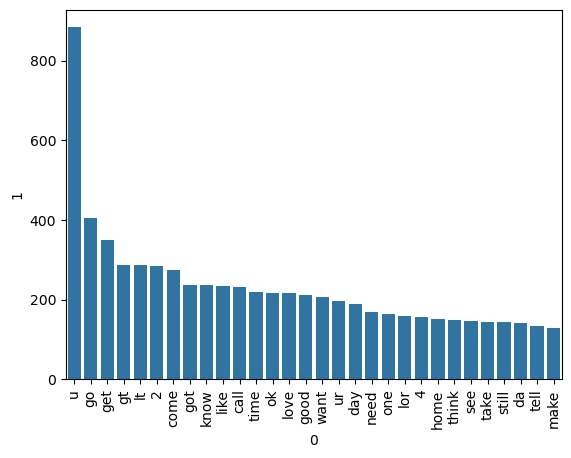

In [59]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()


4. Model Building

In [61]:
 from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
 cv= CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)

In [62]:
X =tfidf.fit_transform(df['transformed_text']).toarray()

In [63]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [108]:
X.shape

(5169, 3000)

In [65]:
y=df['target'].values

In [66]:
print (y)


[0 0 1 ... 0 0 0]


In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [69]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [70]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()


In [71]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)

print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [110]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)

print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [112]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)

print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [74]:
#tfidf--->mnb

In [75]:
!pip install xgboost

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [77]:
svc = SVC(kernel='sigmoid',gamma=1.0)
knc= KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)

lrc = LogisticRegression(solver='liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)

abc =AdaBoostClassifier(n_estimators =50,random_state=2)
bc= BaggingClassifier(n_estimators =50,random_state=2)
etc =ExtraTreesClassifier(n_estimators =50,random_state=2)
gbdt =GradientBoostingClassifier(n_estimators =50,random_state=2)
xgb =XGBClassifier(n_estimators =50,random_state=2)


In [78]:
clfs = {
'SVC': svc,
'KN':knc,
'NB':mnb,
    
'DT':dtc,
'LR':lrc,
'RF':rfc,
    
'AdaBoost':abc,
    
'BgC':bc,
'ETC':etc,
'GDBT':gbdt,
'Xgb': xgb
}


In [79]:
def train_classifier(svc,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred, average='binary')

    return accuracy,precision

In [80]:
print(clfs.keys())  # Check available keys in clfs


dict_keys(['SVC', 'KN', 'NB', 'DT', 'LR', 'RF', 'AdaBoost', 'BgC', 'ETC', 'GDBT', 'Xgb'])


In [81]:
from sklearn.metrics import accuracy_score, precision_score


In [82]:
accuracy_scores_list = []
precision_scores_list = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)

    print("For ", name)
    print("Accuracy - ", current_accuracy)
    print("Precision - ", current_precision)  # Fixed spelling

    accuracy_scores_list.append(current_accuracy)
    precision_scores_list.append(current_precision)

    

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865


D:\sara phone\New folder\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "D:\sara phone\New folder\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "D:\sara phone\New folder\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\sara phone\New folder\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "D:\sara phone\New folder\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9323017408123792
Precision -  0.8333333333333334
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829


D:\sara phone\New folder\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GDBT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  Xgb
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213


In [83]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores_list,'Precision':precision_scores_list}).sort_values('Accuracy',ascending=False)

In [84]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.975822,0.974790
5,RF,0.975822,0.982906
8,ETC,0.974855,0.974576
2,NB,0.970986,1.000000
10,Xgb,0.967118,0.926230
6,AdaBoost,0.960348,0.929204
4,LR,0.958414,0.970297
7,BgC,0.958414,0.868217
9,GDBT,0.946809,0.919192
3,DT,0.932302,0.833333


In [114]:
performance_df1 = pd.melt(performance_df , id_vars = 'Algorithm')

In [116]:
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.975822
1,RF,Accuracy,0.975822
2,ETC,Accuracy,0.974855
3,NB,Accuracy,0.970986
4,Xgb,Accuracy,0.967118
5,AdaBoost,Accuracy,0.960348
6,LR,Accuracy,0.958414
7,BgC,Accuracy,0.958414
8,GDBT,Accuracy,0.946809
9,DT,Accuracy,0.932302


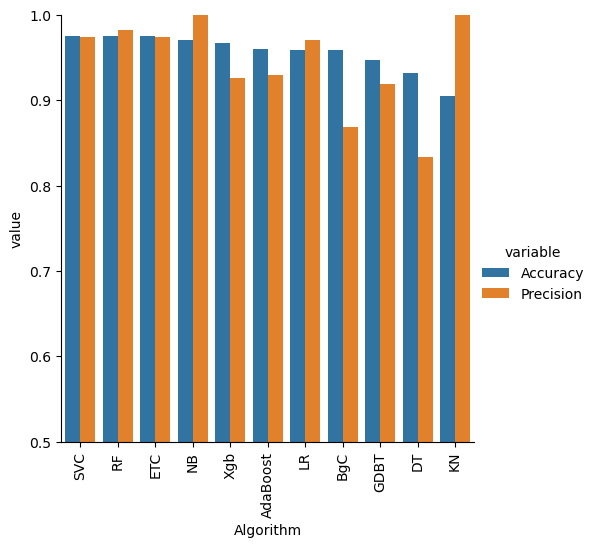

In [118]:
sns.catplot(x='Algorithm' , y='value',
            hue = 'variable',data = performance_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation = 'vertical')
plt.show()

In [88]:
#model improve
# 1. Change the max_features parameter of tfidf

In [89]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),"Accuracy_max_ft_3000" :accuracy_scores_list,'Precision_max_ft_3000':precision_scores_list})

In [90]:
performance_df.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,SVC,0.975822,0.974790,0.975822,0.974790
1,RF,0.975822,0.982906,0.975822,0.982906
2,ETC,0.974855,0.974576,0.974855,0.974576
3,NB,0.970986,1.000000,0.970986,1.000000
4,Xgb,0.967118,0.926230,0.967118,0.926230
5,AdaBoost,0.960348,0.929204,0.960348,0.929204
6,LR,0.958414,0.970297,0.958414,0.970297
7,BgC,0.958414,0.868217,0.958414,0.868217
8,GDBT,0.946809,0.919192,0.946809,0.919192
9,DT,0.932302,0.833333,0.932302,0.833333


In [91]:
#new_df = performance_df.merge(temp_df,on='Algorithm')

In [92]:
#new_df_scaled = new_df.merge(temp_df,on = 'Algorithm')

In [93]:
#new_df_scaled

In [94]:
#Voting Classifier
svc = SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50,random_state =2)

from sklearn.ensemble import VotingClassifier

In [95]:
voting = VotingClassifier(estimators=[('svm',svc), ('nb',mnb), ('et',etc)],voting ='soft')

In [105]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [120]:
print(f"Vectorizer features: {len(tfidf.get_feature_names_out())}")
print(f"Model expects: {mnb.feature_log_prob_.shape[1]}")


Vectorizer features: 3000
Model expects: 3000


In [122]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))